# Метод главных компонент

Один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Изобретён Карлом Пирсоном в 1901 году. Применяется во многих областях, в том числе, в эконометрике, биоинформатике, обработке изображений, для сжатия данных, в общественных науках.<br>
Он же PCA (principal component analysis), он же преобразование Кархунена — Лоэва, он же преобразование Хотеллинга.

Курган, 1 сентября 2013 года. Пояснение автора: "Кошка, вид сзади"

<img src="external-content.duckduckgo.com.jpeg">

При сем тут PCA? Я считаю, что для объяснения чего-либо ужно опираться на аналогию, и чем ярче и сильнее запоминается - тем лучше.

Узнать кошку проще по таким изображениям:

<img src= 'cat-side.png'>

Первое изображение - малоинформативно, второе уже достаточно информативно, чтобы определить объект - кошку. НО оба изображения != сам объект. Кошка, как объект - трехмерна, изображения же двухмерны. Это и есть основной принцип снижения количества размерностей: понизить размерность так, чтобы все равно можно было полностью идентифицировать объект. Если пойти дальше, то на картинке ниже все равно можно идентифицировать представителя семейства кошачьих.

<img src= 'ear.jpeg'>

Как это все работает на датасете:

In [1]:
# Импортируем что нам нужно
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Возьмем атасет с вином https://archive.ics.uci.edu/ml/datasets/wine

In [2]:
df = pd.read_csv('wine.data.csv')
print(df.shape)
df.head()

(178, 14)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


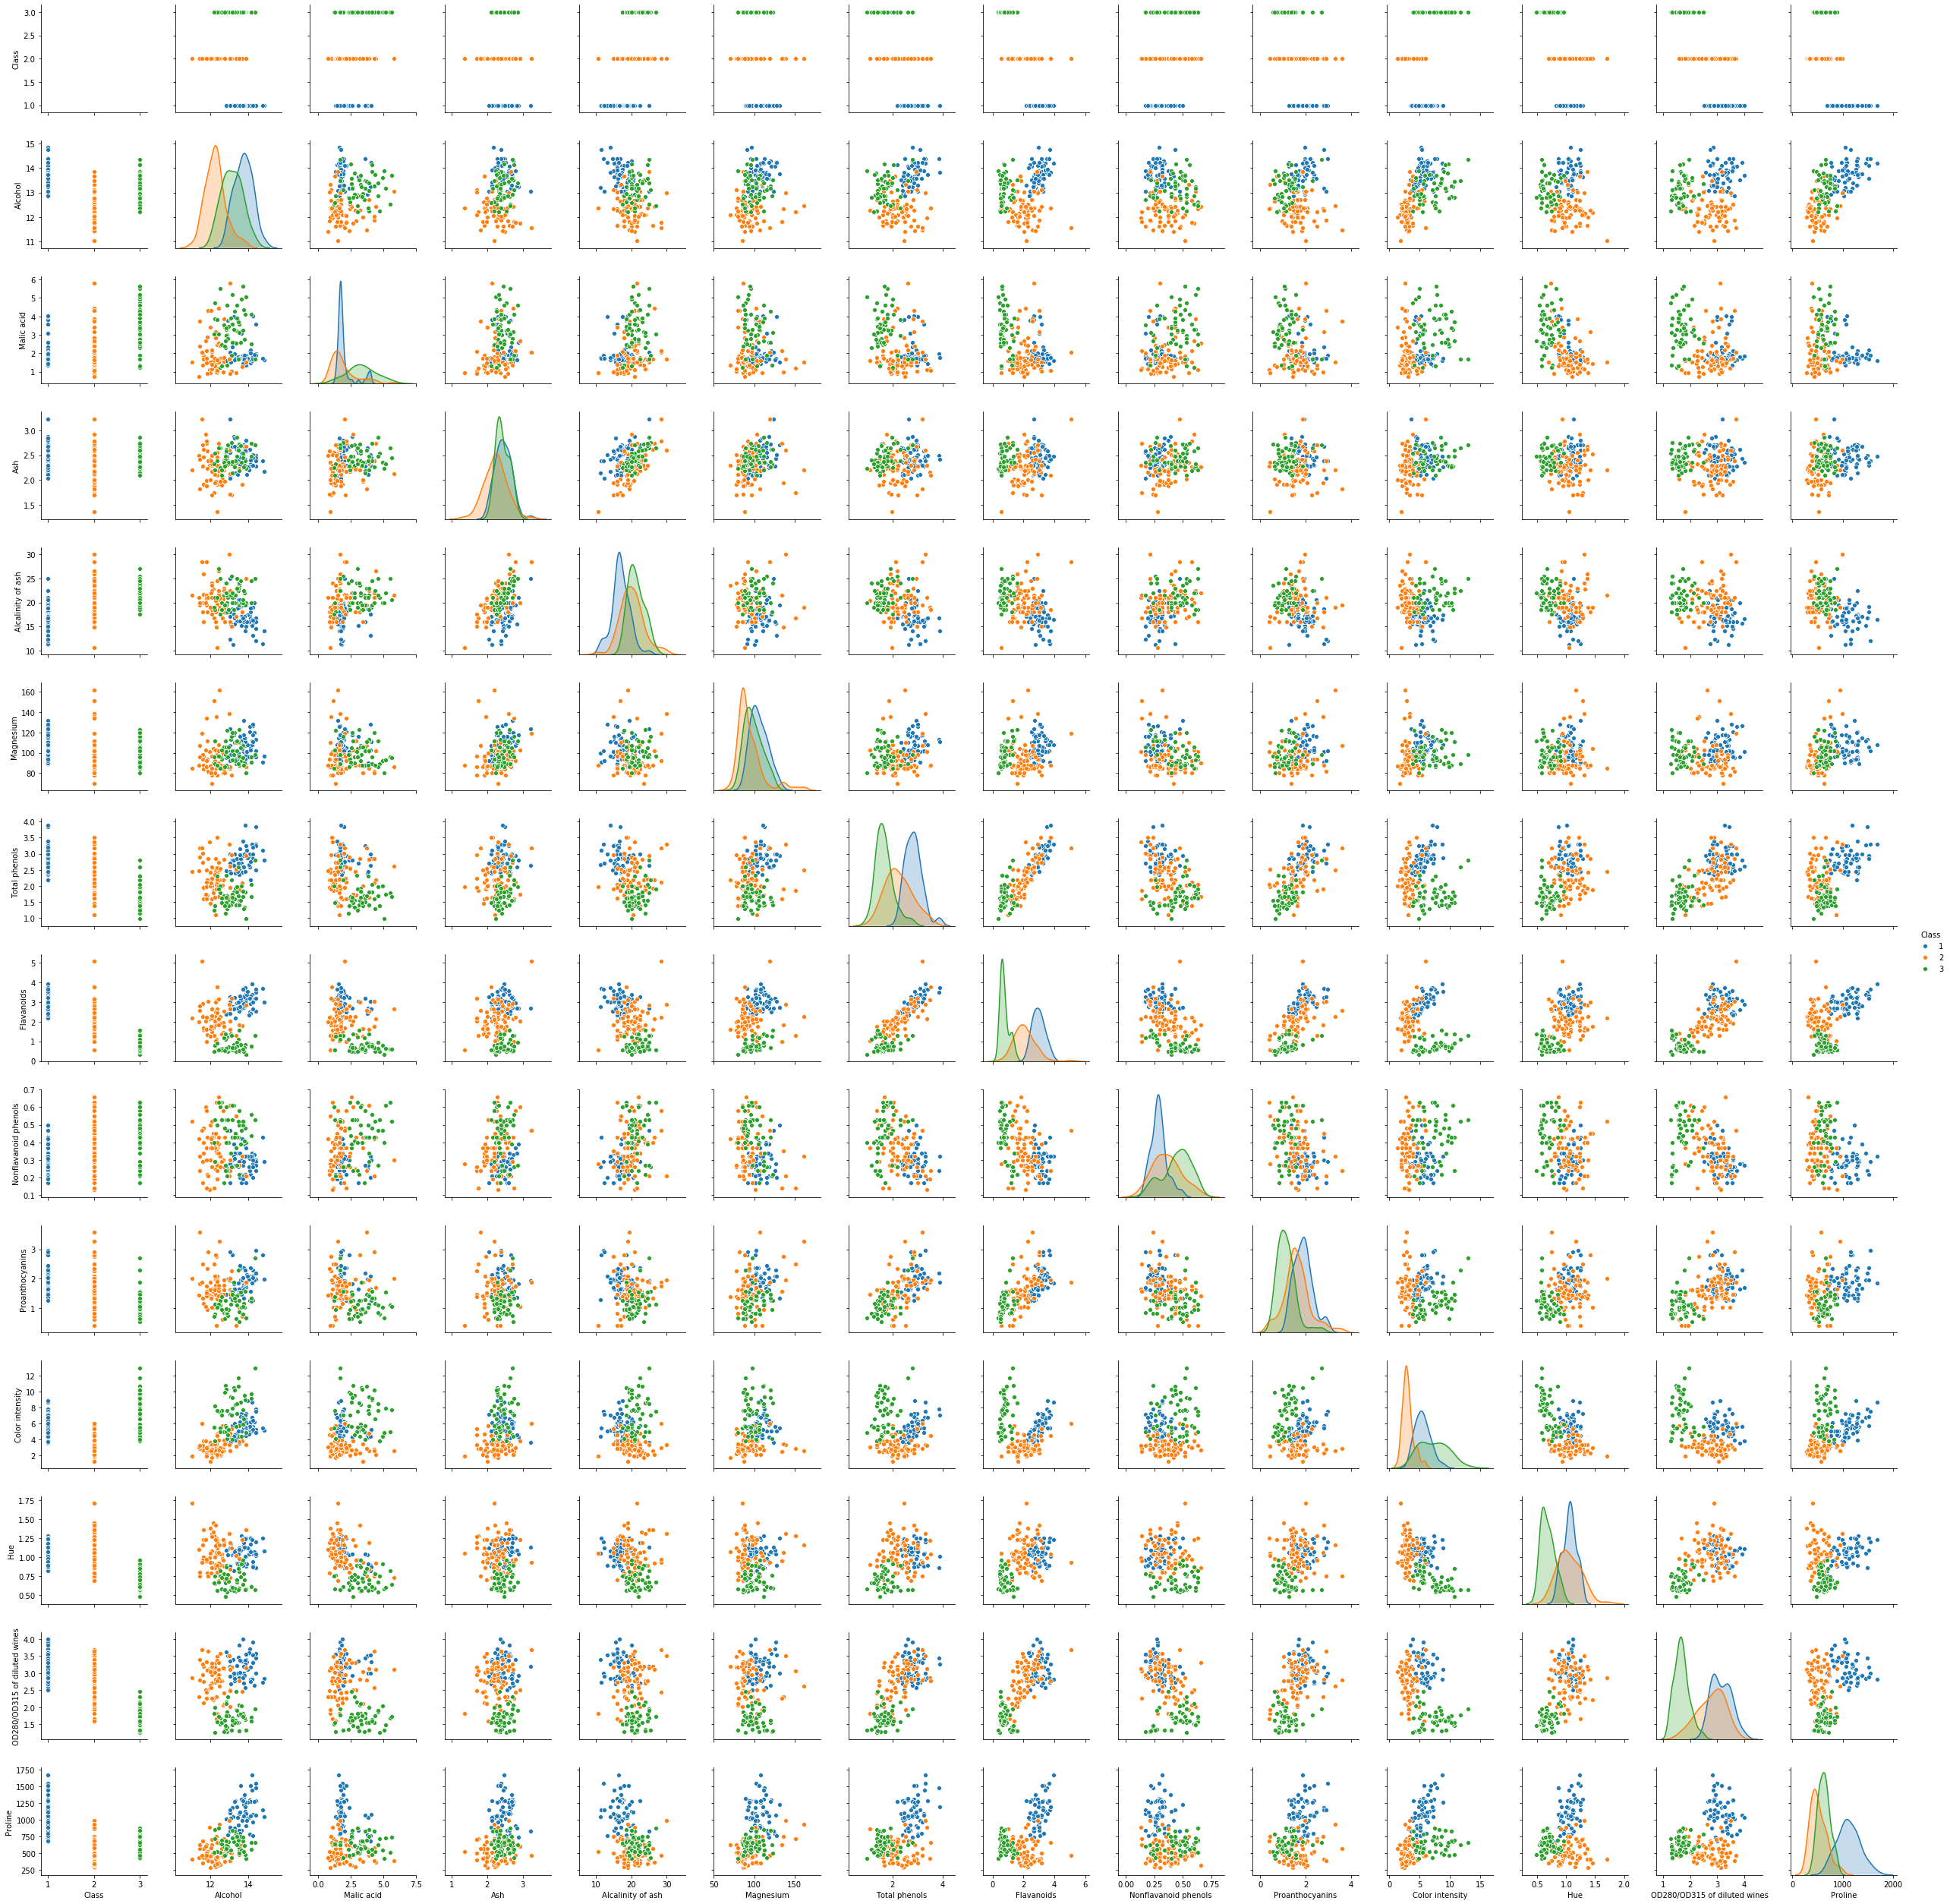

In [7]:
# Посмотрим на pairplot на котором можно увидеть как соотносятся различные переменные
sns.pairplot(df, hue='Class')

На пейрплоте смотрим насколько разделяются графики по классам на диагоналях. На не диагоналях можно увидеть как коррелируют друг с другом переменные. Но удобнее смотреть на хитмапе:

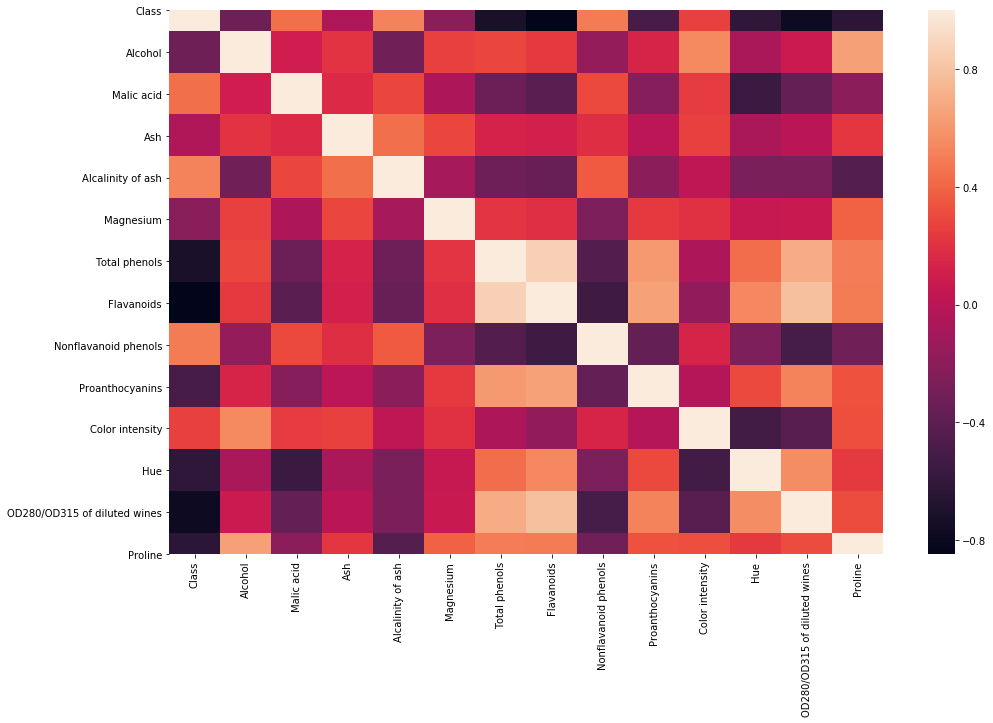

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr());

К примеру возьмем два признака: 'Total phenols' и 'Proline'. Построим график:

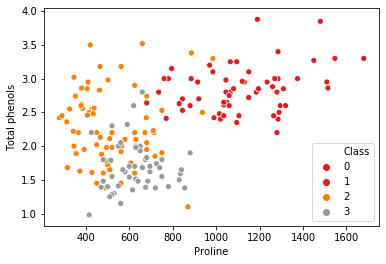

In [9]:
sns.scatterplot(x='Proline', y='Total phenols', data=df, hue = 'Class', palette='Set1');

Так себе. классы делятся, но не очень хорошо. Теперь будем применять PCA.

In [10]:
# Импортируем небходимое
from sklearn.preprocessing import StandardScaler # Стандартный скалер для нормирования признаков
from sklearn.decomposition import PCA # Сам ПИСИА

In [11]:
# Создаем скалер и применяем его к данным, предварительно убрав колонку Class
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Class',axis=1))
df_scaled.shape # проверим что все ок и ничего не пропало

(178, 13)

In [12]:
# Создаем pca
pca = PCA(n_components=None)

In [13]:
# Тренеруем
df_pca = pca.fit(df_scaled) 

Строим график в координатах: Доля дисперсии/Компонент. График показывает какой процент дисперсии описывает каждый новый признак.

Text(0, 0.5, 'Доля дисперсии')

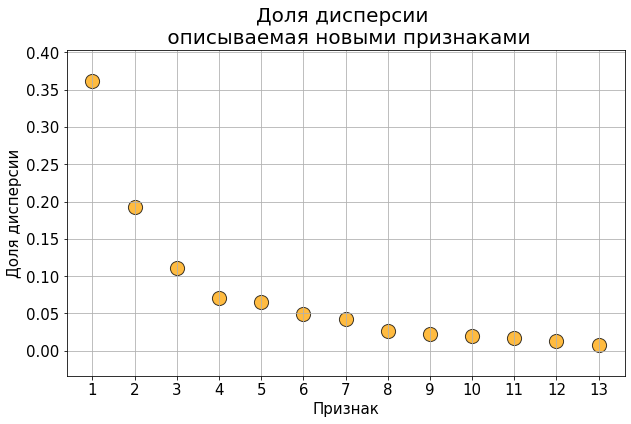

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Доля дисперсии \n описываемая новыми признаками",fontsize=20)
plt.xlabel("Признак",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Доля дисперсии",fontsize=15)

Первый признак описывает более 36% дисперсии, второй чуть менее 20%, третий еще 11%. В результате из 13ти признаков можно выделить 5-6, которые с достаточной точностью разделят классы, уменьшив пространство признаков в два раза!

In [15]:
# Преобразуем данные
df_trans = pca.fit_transform(df_scaled)

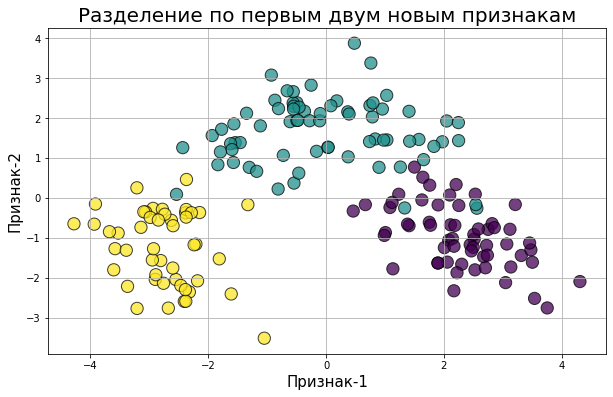

In [16]:
# Строим график
plt.figure(figsize=(10,6))
plt.scatter(df_trans[:,0],df_trans[:,1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Разделение по первым двум новым признакам",fontsize=20)
plt.xlabel("Признак-1",fontsize=15)
plt.ylabel("Признак-2",fontsize=15)
plt.show()

Вот тут уже можно говорить о разделении!

### Выводы

1. С помощью PCA можно уменьшить количество исходных признаков не сильно потеряв в качестве.

2. Вывод не очевидный: При отбразывании новых сгенерированных признаков, вкляд которых в диспесию мал, так же происходит избавление от шума, который эти признаки привносили тоже.